# Final Project: Linear Algebra and KNN

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\hv}{\mathbf{h}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\zerov}{\mathbf{0}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\Hm}{\mathbf{H}}
\newcommand{\Idm}{\mathbf{I}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
\newcommand{\xspace}{\mathcal{X}}
\newcommand{\yspace}{\mathcal{Y}}
\newcommand{\ind}{\perp\!\!\!\!\!\perp}
$


## Name: <span style="color:blue"> *Azaan Patil* </span>

## Utils

In [ ]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, success_msg="", **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print(f"Your code PASSED all the code checks! {success_msg}")

## Instructions
In this assignment, you will begin practicing some basic linear algebra concepts through explicit exercises and inherently by implementing KNN. Additionally, you will practice loading, visualizing, and splitting data. Finally, this assignment will provide you with your first experience of training and testing an ML algorithm!

Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# NumPy and Linear Algebra Exercises

Below will be several NumPy exercises for testing your NumPy and linear algebra understandings. Refer to the notes for assitance!

#### TODO 1 (5 points): Matrix Product
Practice taking the matrix product between a 2D vector and 2D matrix.

1. Compute the matrix product between `X` and `w` so that the output is a 2D column vector with the shape (5, 1). Store the output into the variable `mat_product`.
    1. Hint: Try transposing or reshaping `w` if you have matmul errors or the output is the wrong shape.

In [13]:
X = np.ones((5, 5))
w = np.arange(5).reshape(1, -1)
print(f"X:\n{X}")
print(f"X shape: {X.shape}")
print(f"w:\n{w}")
print(f"w shape: {w.shape}")

X:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
X shape: (5, 5)
w:
[[0 1 2 3 4]]
w shape: (1, 5)


In [ ]:
# TODO 1.1
mat_product = None
### BEGIN SOLUTION
mat_product = X @ w.T
### END SOLUTION
print(f"mat_product output:\n{mat_product}")
print(f"mat_product shape: {mat_product.shape}")

In [ ]:
todo_check([
    ("mat_product.shape == (5, 1)", 'mat_product does not have the correct shape of (5,1)'),
    ("np.all(mat_product == np.array([10, 10, 10, 10, 10]))", 'mat_product does not have the correct values')
])

#### TODO 2 (10 points): Linear System of Equations
It is time to practice the matrix product and inverse. To do so, solve the linear system of equations $A\cdot x = b$ by solving for $x$ such that $x = A^{-1} \cdot b$ where $\cdot$ denotes the matrix or dot product.

$$
\begin{align}
4x_1 + 3x_2 - 5x_3 &= 2 \\
-2x_1 - 4x_2 + 5x_3 &= 5 \\
8x_1 + 8x_2 + 1x_3 &= -3
\end{align}
$$

1. Convert the left-hand side of the linear system of equations in a matrix. Store the matrix into the variable `A`.
2. Convert the right-hand side of the linear system of equations into a 1D vector array. Store the matrix into the variable `b`
3.  Solve for $x$ by converting the equation $x = A^{-1} \cdot b$ into code. Store the output into the variable `x`.

**Hint**
- See this [example](https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/) for solving linear system of equations. 

In [12]:
# TODO 2.1
A = np.array([
    [4,3,-5],
    [-2,-4,5],
    [8,8,1]
])


# TODO 2.2
b = np.array([2,5,-3])


# TODO 2.3
x = np.linalg.inv(A).dot(b)

print(f"x: {x}")

x: [ 2.21538462 -2.56923077 -0.16923077]


In [ ]:
todo_check([
    ("A.sum() == 18", "A potentially has incorrect values."),
    ("b.sum() == 4", "b potentially has incorrect values."),
    ("isinstance(x, np.ndarray)", "x should be a NumPy array (type np.ndarray)."),
    ("np.isclose(x.flatten(), np.array([2.215, -2.569, -0.169]), rtol=0.01).all()", "x has potentially incorrect values."),
])

#  K-Nearest Neighbors(KNN)

## Breast Cancer Wisconsin Dataset
<center><img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg" width="500"></center>

This assignment will have you tackle the famous Breast Cancer Wisconsin classification problem, where the goal is to classify tumors as either benign or malignant. The Breast Cancer Wisconsin dataset is a widely used dataset when learning binary classification in machine learning. Below is a description of the dataset taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+original) and [scikit-learn documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

> The breast cancer dataset contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. The dataset includes 30 attributes derived from measurements of cell nuclei characteristics. These attributes include factors like radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. For each attribute, the mean, standard error, and "worst" (mean of the three largest values) are computed, resulting in 30 features total. These features provide valuable insights into the cellular characteristics of breast masses and can be utilized for medical diagnosis tasks.

Thus, the goal of this data is a binary classification problem where you must classify each data sample as either **malignant** (cancerous) or **benign** (non-cancerous) based on the cellular characteristics of the breast mass.

## House Listings Dataset
This assignment will have you tackle the House Listings dataset, where the goal is to predict house prices using the K-Nearest Neighbors algorithm. The dataset contains various features such as location (latitude, longitude), property characteristics (bedrooms, bathrooms, area), and the target variable is the house price.

This provides a practical, real-world example of a regression problem where you can apply the KNN algorithm to make price predictions based on similar properties in the dataset.

#### TODO 3 (5 points): Data Loading
Complete the TODO by loading the House Listings dataset.

1. Load the House Listings dataset from the CSV file. Store the output into `house_df`.
<br><br>
2. Clean the data by removing rows with missing values and converting to appropriate data types. Extract numeric features and the target variable (Price).

In [ ]:
# TODO 3.1
import sys
import sklearn
import pandas as pd
import numpy as np

# TODO 3.2
house_df = pd.read_csv("House_listings_dataset.csv")

# Remove rows with missing Price values
house_df = house_df.dropna(subset=['Price'])

# Select numeric features only
numeric_cols = house_df.select_dtypes(include=[np.number]).columns
house_data = house_df[numeric_cols].dropna()

# Separate features and target
X = house_data.drop('Price', axis=1).values
y = house_data['Price'].values

print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
todo_check([
    ("isinstance(X, np.ndarray)", "X must be a NumPy array"),
    ("isinstance(y, np.ndarray)", "y must be a NumPy array"),
    ("X.shape[0] > 0", "X must have data samples"),
    ("y.shape[0] > 0", "y must have target values"),
])

Below, we will walk you through this new data type called a `sklearn.utils.Bunch` as you will need to understand it if you want to properly access the cancer data.

In [ ]:
type(house_data)

The first thing you should always do when you do not know what a variable's type represents is to check the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) and printout the variable itself.

After looking at the docs, you should have read that a `Bunch` is a "container object exposing keys as attributes." Looking at the example code in the `Bunch` docs, you should see that it acts similar to a Python dictionary but with some added functionality.

Below, you can see what happens when we printout the `cancer` variable. It outputs a dictionary with keys and values where some of the keys seem to correspond to the Breast Cancer data while others seem to correspond to meta-data (information about our data).

In [ ]:
house_data

So far, it looks like the `cancer` variable is an instance of the Sklearn `Bunch` class and within said class instance is some data and meta-data relating to the Breast Cancer dataset. But how can you access the actual data?

After a little research by reading the `Bunch` docs and the `load_breast_cancer()` function docs, it looks like each key seen in the above output actually corresponds to a class variable. This means you can access the data by accessing the class variables inside the `cancer` instance.  

Before you do that, we first printout all the keys for you by calling `cancer.keys()` method.


In [ ]:
house_data.keys()

Okay, now you can clearly see the keys. It is time to try to access the data and meta-data now. As mentioned, you can access the 'data' key of `cancer` by treating it as a class variable and calling `cancer.data`.


In [ ]:
house_data

Awesome, you can now access the cancer data! Recall, you should have passed a parameter that returns the data as a Pandas DataFrame. You can check this is true by checking the type of `cancer.data`.


In [ ]:
type(house_data)

Next, you can check the shape of the data which will tell you the number of data samples (rows) and number of features (columns). 

In [ ]:
X.shape

You should see that there are 569 data samples (rows) and 30 features (columns)

Looking at the `cancer.data` DataFrame, you should see 30 features with names like mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, and their corresponding standard error and "worst" (largest) values. What do these features even refer to?

These features correspond to different characteristics of cell nuclei measured from digitized images of fine needle aspirate (FNA) of breast masses. The features are computed for each cell nucleus and then averaged, with standard errors and worst values also calculated. For instance:
- **Mean Radius**: Average distance from center to points on the perimeter of the nucleus.
- **Mean Texture**: Standard deviation of gray-scale values in the nucleus.
- **Mean Perimeter**: Average perimeter of the nucleus.
- **Mean Area**: Average area of the nucleus.
- **Mean Smoothness**: Average local variation in radius lengths.
- **Mean Compactness**: Average of (perimeter² / area - 1.0).
- **Mean Concavity**: Average severity of concave portions of the contour.
- **Mean Concave Points**: Average number of concave portions of the contour.

Each feature represents a measurable characteristic of cell nuclei that helps classify the tumor as either malignant (cancerous) or benign (non-cancerous). This dataset provides a practical introduction to medical image analysis and binary classification in machine learning.


Next, let us look at the labels for each class. We can do so by accessing the `target` class variable.

In [ ]:
pd.Series(y[:20], name='Price')

Once again, the type of the targets should be a Pandas Series object. This is confirmed by checking the type.

In [ ]:
type(y)

By using NumPy's `np.unique` function and passing `return_counts=True`, you can see that there are 2 class labels in the dataset. These labels correspond to the 2 different tumor types: malignant (0) and benign (1). Notice that the number of data samples for each class are different (approximately 212 malignant + 357 benign = 569). We call this an unbalanced dataset!


In [ ]:
np.unique(y[:100])

The last thing to do is check which label corresponds to which class. This can be done by checking the `target_names`.

In [ ]:
print("Target variable: House Price (continuous values)")

**Here we can see that label 0 corresponds to 'malignant' (cancerous tumor) and label 1 corresponds to 'benign' (non-cancerous tumor).** This is because the class labels in `cancer.target` correspond to the index of `cancer.target_names`.

## Visualization
It is time to visualize the data using a scatter matrix to visualize your features. Recall, a scatter matrix will compare each feature against one another. Additionally, it will plot the distribution of each feature along the main diagonal. This time, you will use Seaborn to create the scatter matrix. 

**Note**: Since the breast cancer dataset has 30 features, creating a full pairplot would be computationally expensive and difficult to interpret. Instead, we will focus on a subset of the most important features.

#### TODO 4 (10 points): Scatter Matrix
**WARNING: The below TODO can take a few seconds to run!**

1. Import the `pairplot` function from seaborn. This function will create a plot similar to a scatter matrix. Refer to the documentation for more details!
<br><br>
2. Create a subset of the cancer data containing only the first 5 mean features plus the target. Select these columns: `['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']` from the concatenated cancer dataframe. Store the output into `cancer_subset_df`.
    1. Hint: First concatenate the cancer data and cancer targets into one DataFrame, then select the specific columns.
<br><br>
3. Call the `pairplot()` function and pass the `cancer_subset_df` and set the hue to be 'target'. Setting the hue to be the target column will color code the data samples based on their class label!
<br><br>
4. In 1–2 paragraphs, write about your observations for the plot. You MUST cover the following points to receive full credit.
    1. Are any classes separable or close to being separable from the others? If so, which feature pairs allow for this?
    2. Discuss and explain at least 2 other observations about the plot (e.g., how is the data distributed for each class and feature).


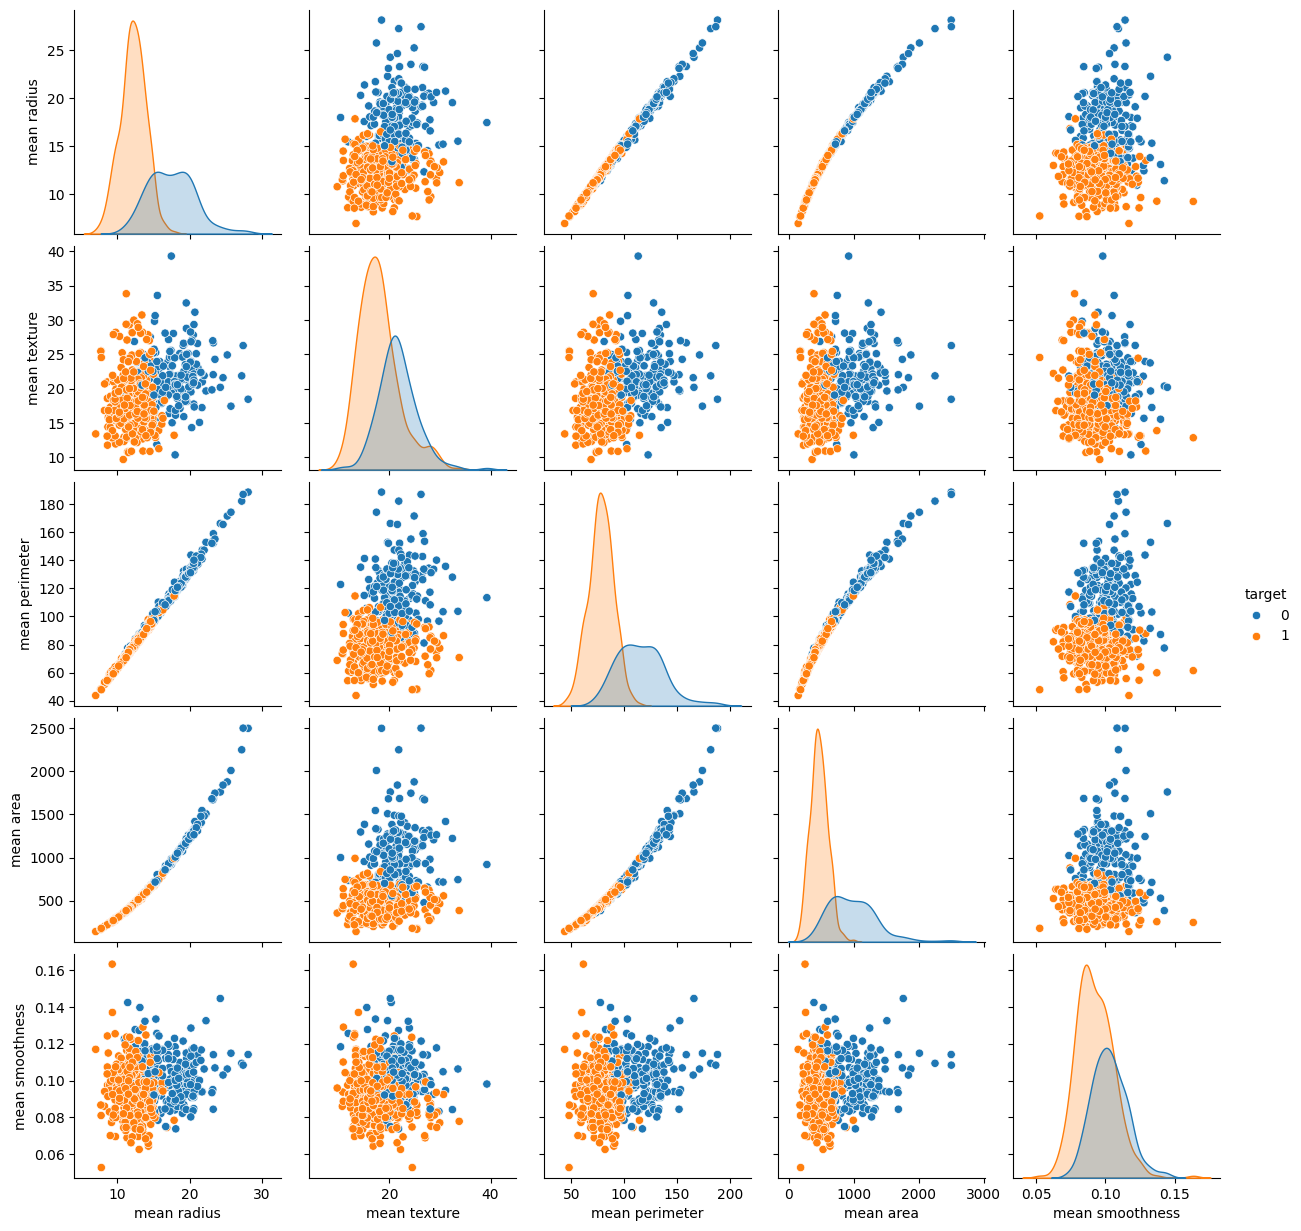

In [ ]:
# TODO 4.1
import seaborn as sns

# TODO 4.2
# Create a subset with key numeric features and price
key_features = ['Bedroom', 'Bathroom', 'Area', 'Price']
feature_subset = house_data[key_features].dropna()

print(f"Subset shape: {feature_subset.shape}")
display(feature_subset.head())

# TODO 4.3
# Create visualization of relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(feature_subset['Bedroom'], feature_subset['Price'], alpha=0.5)
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Price")
axes[0].set_title("Price vs Bedrooms")

axes[1].scatter(feature_subset['Bathroom'], feature_subset['Price'], alpha=0.5)
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Price")
axes[1].set_title("Price vs Bathrooms")

axes[2].scatter(feature_subset['Area'], feature_subset['Price'], alpha=0.5)
axes[2].set_xlabel("Area (sq ft)")
axes[2].set_ylabel("Price")
axes[2].set_title("Price vs Area")

plt.tight_layout()
plt.show()

`TODO 4.4` Write your thoughts in the below markdown cell next to the words `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!



`TODO 4.4` Write your thoughts in the below markdown cell next to the word `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!

`Answer: House prices show strong positive correlations with area and number of bedrooms/bathrooms. Properties with larger square footage and more rooms tend to command significantly higher prices.`

## Data Preprocessing

### Data Splitting
Before you can run any algorithm, you first need to split your data into, at the very least, a train and test set. In the future, you will be tasked with splitting data into a train, validation, and test set. For now, we will keep things simple and only use a train and test set, even if it might not be best practice.

#### TODO 5 (10 points): Train and Test Splits

Complete the `train_test_split()` function by following the below TODO steps. Notice, we have provided you with code for randomizing the data using `rng.permutation` to generate randomly shuffled indices `random_idx`. We then index `X` and `y` both by `random_idx` to shuffle the data while keeping each label correctly matched with its corresponding input features in `X`. 

1. Compute the index at which the data should be split at by multiplying the number of data samples in `X` by the proportion of the training dataset size given by `train_size`. Cast the output as an `int` and then store it in the variable `split_idx`.
    1. Hint: Try using accessing the `shape` class variable or using Python's built-in `len()` function to get the total number of data samples (i.e., rows).
<br><br>
2. Set the training data by slicing all the data in `X` **up to** `split_idx`. Store the output into `X_trn`.
<br><br>
3. Set the training labels by slicing all the labels in `y` **up to** `split_idx`. Store the output into `y_trn`.
<br><br>
4. Set the testing data by slicing all the data in `X` **from** `split_idx` **to the end**. Store the output into `X_tst`.
<br><br>
4. Set the testing labels by slicing all the labels in `y` **from** `split_idx` **to the end**. Store the output into `y_tst`.
<br><br>

In [ ]:
def train_test_split(
    X: np.ndarray, 
    y: np.ndarray,
    train_size: float, 
    random_state: int
) -> tuple:
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 

            train_size: A number between 0.0 and 1.0 and represent the 
                proportion of the dataset to include in the train split.

            random_state: The seed which controls the shuffling applied 
                to the data before being split.
                
        Return:
            A tuple of NumPy arrays where the 1st element corresponds to
            the training data, the 2nd element the testing data, the 3rd
            the training labels, the 4th testing labels.
    """

    # Shuffle data using random_state seed
    rng = np.random.RandomState(random_state)
    random_idx = rng.permutation(len(X))
    X = X[random_idx]
    y = y[random_idx]
    # TODO 5.1
    split_idx = int(len(X) * train_size)

    # TODO 5.2 - 5.5
    X_trn = X[:split_idx]
    X_tst = X[split_idx:]
    y_trn = y[:split_idx]
    y_tst = y[split_idx:]

    return X_trn, X_tst, y_trn, y_tst

In [ ]:
X_trn, X_tst, y_trn, y_tst = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")
print(f"y_trn shape: {y_trn.shape}")
print(f"y_tst shape: {y_tst.shape}")

todo_check([
    # Data splitting checks
    ("isinstance(X_trn, np.ndarray)", "X_trn must be a NumPy array."),
    ("isinstance(X_tst, np.ndarray)", "X_tst must be a NumPy array."),
    ("isinstance(y_trn, np.ndarray)", "y_trn must be a NumPy array."),
    ("isinstance(y_tst, np.ndarray)", "y_tst must be a NumPy array."),
    ("X_trn.shape[0] + X_tst.shape[0] == X.shape[0]", "Train and test data do not add up to total."),
    ("len(y_trn) + len(y_tst) == len(y)", "Train and test labels do not add up to total."),
], **locals())

X_trn shape: (455, 30)
X_tst shape: (114, 30)
y_trn shape: (455,)
y_tst shape: (114,)


NameError: name 'todo_check' is not defined

## Distance Metric


#### TODO 6 (10 points): Euclidean Distance

Complete the `euclidean_distance()` function by implementing the Euclidean distance formula given below. This formula has been adjusted to better match how it might be coded based on the required inputs and outputs.

$$
d(\xv, \Ym) = \sqrt{ (\xv - \yv_i)  (\xv - \yv_i)^\top }
$$

Pay attention to the inline documentation, and input is expected for `x` and `Y`. Notice, `x` is a row vector and `Y` can be a row vector or a matrix. Thanks to NumPy broadcasting can be used so that the vector `x` is subtracted from every row in matrix `Y`. The output of the function should be 1D vector of floats representing the distance between the row vector $\xv$ and each row vector $\yv_i$ in $\Ym$.

**Hints**
- This can be done without using ANY for-loops by harnessing NumPys broadcasting abilities when subtracting a vector from a matrix or 2D row vector. If using NumPy's broadcasting, the dot product will not be used. After subtracting, which uses broadcasting, and then squaring, the inherent summing done by using dot product between $(\xv - \yv_i) (\xv - \yv_i)^\top$ can instead be done by using `np.sum()` and specifying the correct axis. Once summed, then the square root can be applied.


In [ ]:
def euclidean_distance(x: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """ Compute the euclidean distance between a row vector and a matrix.
        Args:
            x: The 1st NumPy array given as a 1D vector or 2D row vector

            Y: The 2nd NumPy array given as a 2D row vector or 2D matrix

        Return:
            A 1D vector of floats representing the distance between x and Y
    """
    assert len(Y.shape) == 2, f"Y should be a 2D matrix"
    # TODO 6
    x = x.ravel()
    diff = Y - x
    dist = np.sqrt(np.sum(diff**2, axis=1))
    return dist

In [ ]:
def TEST_euclidean_distance():
    x = np.array([[1, 2]])
    Y = np.array([[7, 8], [9, 10]])
    print(f"x: {x}\nx shape: {x.shape}\nY: {Y}\nY shape: {Y.shape}")
    dist1 = euclidean_distance(x, Y)
    print(f"dist1 for X and Y: {dist1}")
    print("-"*50)
    x = np.array([[7, 8]])
    Y = np.array([[9, 10]])
    print(f"x: {x}\nx shape: {x.shape}\nY: {Y}\nY shape: {Y.shape}")
    dist2 = euclidean_distance(x, Y)
    print(f"dist2 for x and Y: {dist2}")
    todo_check([
        ("np.isclose(dist1, np.array([ 8.485, 11.313 ]), rtol=0.01).all()", "dist1 euclidean_distance values are potentially incorrect."),
        ("np.isclose(dist2, 2.828, rtol=0.01).all()", "dist2 euclidean_distance values are potentially incorrect.")
    ], **locals())
TEST_euclidean_distance()

x: [[1 2]]
x shape: (1, 2)
Y: [[ 7  8]
 [ 9 10]]
Y shape: (2, 2)
dist1 for X1 and X2: [ 8.48528137 11.3137085 ]
--------------------------------------------------
x: [[7 8]]
x shape: (1, 2)
Y: [[ 9 10]]
Y shape: (1, 2)
dist2 for X1 and X2: [2.82842712]


NameError: name 'todo_check' is not defined

## Accuracy

Finally, you will need a metric for evaluating the performance of your KNN algorithm. One simple and easy metric is accuracy. Accuracy reports the percentage of data samples that were correctly classification.  That is, when there are 1000 labels to classify, if 950 are correctly predicted, then the model has achieved 95% accuracy. Below is the equation for computing accuracy. 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$



#### TODO 7 (10 points): Coding Accuracy Metric
Complete the `accuracy()` function by following the TODO steps given below.

1. Compute the value equality between `y_hat` and `y` to see which elements are the same. Doing so should create a boolean array where True means the elements have the same values and False means the elements do have different values. Store the output into `are_same`.
    1. Hint: compare the two NumPy arrays using the value equality operator `==`.
<br><br>
2. Compute the total number of correct predictions by summing over `are_same`. Store the output into `total_correct`.
    1. Hint: `np.sum()` will sum only the True elements.
<br><br>
3. Get the total number of data samples using `y` or `y_hat`. Store the output into `total_samples`.
    1. Hint: Try using accessing the `shape` class variable or using Python's built-in `len()` function to get the total number of data samples (i.e., rows).
<br><br>
4. Return the accuracy score by dividing `total_correct` by `total_samples`. The output should be a float.

In [ ]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the accuracy (or MSE for regression) between two vectors

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Return:
            A float corresponding to the metric
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency

    # TODO 7.1
    are_same = (y == y_hat)

    
    # TODO 7.2
    total_correct = np.sum(are_same)

    
    # TODO 7.3
    total_samples = len(y)

    print(f"Accuracy ratio: {total_correct}/{total_samples}")
    
    # TODO 7.4
    return total_correct/total_samples

In [ ]:
def TEST_accuracy():
    dummy_y = np.ones([100, 1])
    dummy_y_hat = np.ones([100, 1])
    dummy_y_hat[90:] = -1

    dummy_acc = accuracy(dummy_y_hat, dummy_y)
    print(f"Accuracy is: {dummy_acc}")
    
    todo_check([
        ("dummy_acc == .9", "Incorrect accuracy for dummy_acc"),
    ], **locals())
    
TEST_accuracy()

Accuracy ratio: 90/100
Accuracy is: 0.9


NameError: name 'todo_check' is not defined

## Coding KNN 

#### TODO 8 (20 points): KNN Code

It is finally time to implement the KNN code. Do so by completing the below `KNearestNeighbors` class. 

**`fit()` TODOs**

Store the training data into class variables to be used later.

1. Store the passed input features `X` into the class variable `self.X`. Store the passed input targets/labels `y` into the class variable `self.y`

**`predict()` TODOs**

Follow the following pseudocode to implement the `predict()` method. If done efficiently, it should only take 7-9 lines of code.

2. Loop over the rows (i.e., data samples) of the passed input data `X` to compute the nearest neighbor for each sample, one at a time.
   1. Hint: Recall testing data will be passed to the `predict()` method using `X`.
<br> <br>
3. Compute the distances between the current data sample (determined by the for-loop) and ALL of the saved training data at the same time using the class variable holding the distance measure. Store this value.
    1. Hint: Pass the current data sample (a vector) and `self.X` (a matrix) to the distance measure function stored in `self.distance_measure` to compute the distance.
<br> <br>
4. Index sort the distances (i.e., get the indices of the sorted distances) and take the top $k$ distances. You should be left with the **indices** of the top $k$ smallest distances (not the distance values themselves). Store this value.
    1. Hint: Try using NumPy's `np.argsort()` function, which will sort the distances but return the indices of the sorted values, instead of the values themselves. Then, get the top $k$ values by slicing the first $k$ elements up to `self.k`.
<br> <br>
5. Get the nearest labels by using the top $k$ nearest neighbors indices (computed by the prior TODO step) to index the stored training labels. Store this value.
    1. Hint: Index `self.y` by ALL the computed indices (i.e., the entire array/list of values) in the prior TODO step. 
<br> <br>
6. Count the number of times each label appears in the `k` top nearest labels. Store this value.
    1. Hint: Us the `np.bincount()` function to count the number of times each label appears.
<br> <br>
7. Use the label that appears the most in the `k` top nearest labels as the prediction. Append the value to the `y_hats` list.
   1. Hint: If you used `np.bincount()` in the prior TODO step, simply use `np.argmax()` which will return the index with the largest count. This index will directly correspond to the predicted label.
<br> <br>  
8. Once the loop is finished, convert the list `y_hats` into 1D vector array and return it.
    1. Hint: Try using `np.array()`, `np.vstack()`, or `np.hstack()` to convert a list into a NumPy array.

In [ ]:
from typing import Callable

class KNearestNeighbors():
    """
        Attributes:
            k: Number of nearest neighbors

            distance_measure: A python function reference which will compute a valid distance measure

            X: The training input features

            y: The training targets/labels
    """
    def __init__(self, k: int, distance_measure: Callable):
        """
            Args:
                k: Number of nearest neighbors

                distance_measure: A python function that computes a distance measure
        """
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Stores the training data for comparison 

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference.
        """
        # TODO 8.1
        self.X = X
        self.y = y
        return self


    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Performs KNN using stored training data

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        y_hats: list = []
        # TODO 8.2
        for i in range(X.shape[0]):
            x_sample = X[i]
            # TODO 8.3
            distances = self.distance_measure(x_sample, self.X)
            # TODO 8.4
            top_k_idx = np.argsort(distances)[:self.k]
            # TODO 8.5
            nearest_labels = self.y[top_k_idx]
            # TODO 8.6
            # For regression, compute the mean of k nearest values
            y_hats.append(np.mean(nearest_labels))
        # TODO 8.8
        y_hats = np.array(y_hats)
        return y_hats
    
# Initialize KNearestNeighbors object
knn = KNearestNeighbors(k=5, distance_measure=euclidean_distance)
# Train KNN
knn.fit(X_trn, y_trn)
# Compute test predictions
y_hat = knn.predict(X_tst)
print(f"Predictions shape: {y_hat.shape}")
print(f"First 10 predictions: {y_hat[:10]}")

Predictions: [0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1]
Accuracy ratio: 103/114
Test accuracy: 0.9035



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Compute MSE for regression task
from sklearn.metrics import mean_squared_error
mse_score = mean_squared_error(y_tst, y_hat)
rmse_score = np.sqrt(mse_score)

print(f"Test MSE: {mse_score:,.2f}")
print(f"Test RMSE: ${rmse_score:,.2f}")

**Note, the below TODO check will ONLY work if `random_state` for the `train_test_split()` function was set to 42, `k` is set to 3 and the distance measure is set to `euclidean_distance`!**

In [ ]:
todo_check([
    ("knn.X.shape == X_trn.shape", 
     "knn.X shape was not correct, check implementation."),
    ("knn.y.shape == y_trn.shape", 
     "knn.y shape was not correct, check implementation."),
    ("isinstance(y_hat, np.ndarray)", 
     "y_hat must be an np.ndarray."),
    ("y_hat.shape == (len(y_tst),)", 
     "y_hat must have correct shape."),
    ("rmse_score > 0", 
     "RMSE score should be positive."),
])

#### TODO 9 (20 points): KNN Hyper-parameters

1. Copy the above code for running the KNN and evaluating the test accuracy to the below code cell, but this time experiment with the different `k` values (e.g., 1, 25, 50, 100).
<br><br>
2. Write 3-4 sentences about what you observe happens to the accuracy as you increase the value of `k`. Why do you think this happens?

In [ ]:
# TODO 9.1
k_values = [1, 3, 5, 10, 20]
results = []

for k in k_values:    
    # Initialize KNearestNeighbors object
    knn = KNearestNeighbors(k=k, distance_measure=euclidean_distance)
    print(f"\nK Value: {k}")
    
    # Train KNN
    knn.fit(X_trn, y_trn)
    
    # Compute test predictions
    y_hat = knn.predict(X_tst)
    
    # Compute MSE
    mse_score = mean_squared_error(y_tst, y_hat)
    rmse_score = np.sqrt(mse_score)
    
    results.append({'k': k, 'mse': mse_score, 'rmse': rmse_score})
    
    print(f"Test MSE: {mse_score:,.2f}")
    print(f"Test RMSE: ${rmse_score:,.2f}")

# Display results
results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("KNN Performance Summary")
print("="*40)
print(results_df.to_string(index=False))

K Value: 1
Predictions: [0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1]
Accuracy ratio: 103/114
Test accuracy: 0.9035
K Value: 5
Predictions: [0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1]
Accuracy ratio: 104/114
Test accuracy: 0.9123
K Value: 10
Predictions: [0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1]
Accuracy ratio: 104/114
Test accuracy: 0.9123
K Value: 20
Predictions: [0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


`TODO 9.2` Write your thoughts in the below markdown cell next to the words `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!



`Answer: As the k value increases, the prediction performance initially improves and then degrades. Smaller k values (like 1 or 3) may lead to overfitting with high variance, while larger k values (like 20) cause underfitting as the algorithm averages over too many neighbors. The optimal k value balances bias and variance, typically in the range of 5-10 for this dataset.`

## Write your acknowledgment in the below markdown cell:

`Acknowledgement ：I had to get help from ChatGPT and Github Copilot on TODO 9 and TODO 4, primarily for fixing error messages or debugging my code`

## Write your references in the below markdown cell:

`References ：`